In [58]:
from scipy.stats import t, norm, ttest_ind, expon, lognorm, chi2, beta, cauchy
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import permutation_test as p
from sklearn.preprocessing import scale
import pandas as pd
from sklearn.cluster import KMeans

plt.style.use('ggplot')

In [4]:
#!pip install permutation_test

### Задание 1.1

In [5]:
def pval(smean, stdev, mu, n):
    return 1-t.cdf((smean-mu)*np.sqrt(n)/stdev, df = n-1)

In [6]:
p0 = []
for i in range(1000):
    norm_var = norm.rvs(0, scale = 1, size = 4)
    smean = np.mean(norm_var)
    stdev = 1
    pv = pval(smean, stdev, 0, 4)
    p0.append(pv)

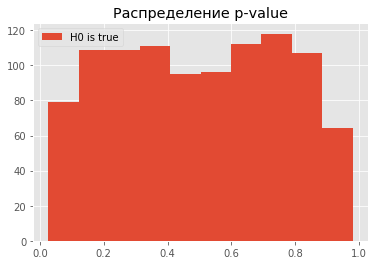

In [7]:
plt.hist(p0, label = 'H0 is true')
plt.legend()
plt.title('Распределение p-value')
plt.show()

In [8]:
p05 = []
for i in range(1000):
    norm_var = norm.rvs(0.5, scale = 1, size = 4)
    smean = np.mean(norm_var)
    stdev = 1
    pv = pval(smean, stdev, 0, 4)
    p05.append(pv)

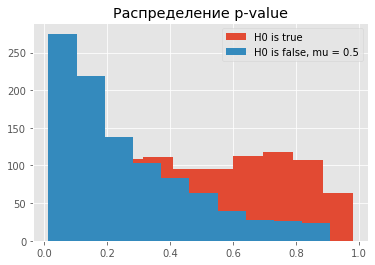

In [9]:
plt.hist(p0, label = 'H0 is true')
plt.hist(p05, label = 'H0 is false, mu = 0.5')
plt.legend()
plt.title('Распределение p-value')
plt.show()

In [10]:
p1 = []
for i in range(1000):
    norm_var = norm.rvs(1, scale = 1, size = 4)
    smean = np.mean(norm_var)
    stdev = 1
    pv = pval(smean, stdev, 0, 4)
    p1.append(pv)

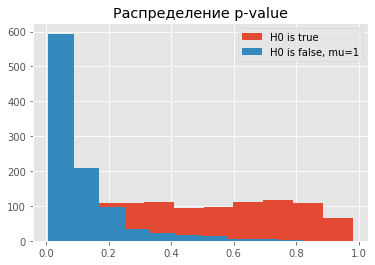

In [11]:
plt.hist(p0, label = 'H0 is true')
plt.hist(p1, label = 'H0 is false, mu=1')
plt.legend()
plt.title('Распределение p-value')
plt.show()

### Задание 1.2
Мат. ожидание экспоненциального распределения не может равняться 0 :) 
Поэтому будем считать 
$H_0$: $\lambda$ = 1 - верная гипотеза. $H_0$: $\lambda$ = 0.5 - неверная гипотеза.

Во втором случае тест асимптотический. Сходимость к нормальному (или Стьюдента) распределению наступает с ростом N, что видно на графиках.

In [12]:
pexp1 = []
pexp1f = []
for i in range(1000):
    exp_var = expon.rvs(scale = 1, size = 4)
    smean = np.mean(exp_var)
    stdev = 1
    pv = pval(smean, stdev, 1, 4)
    pvf = pval(smean, stdev, 0.5, 4)
    pexp1.append(pv)
    pexp1f.append(pvf)

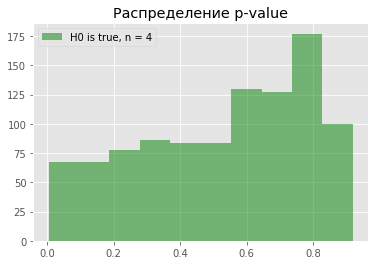

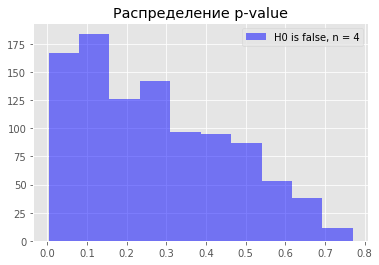

In [13]:
plt.hist(pexp1, label = 'H0 is true, n = 4', color = 'g', alpha = 0.5)
plt.legend()
plt.title('Распределение p-value')
plt.show()

plt.hist(pexp1f, label = 'H0 is false, n = 4', color = 'b', alpha = 0.5)
plt.legend()
plt.title('Распределение p-value')
plt.show()

In [14]:
pexp2 = []
pexp2f = []
for i in range(1000):
    exp_var = expon.rvs(scale = 1, size = 10)
    smean = np.mean(exp_var)
    stdev = 1
    pv = pval(smean, stdev, 1, 10)
    pvf = pval(smean, stdev, 0.5, 10)
    pexp2.append(pv)
    pexp2f.append(pvf)
    

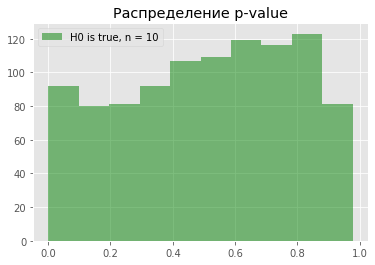

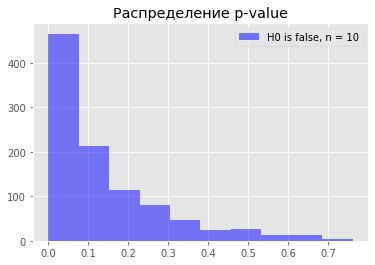

In [15]:
plt.hist(pexp2, label = 'H0 is true, n = 10', color = 'g', alpha = 0.5)
plt.legend()
plt.title('Распределение p-value')
plt.show()

plt.hist(pexp2f, label = 'H0 is false, n = 10', color = 'b', alpha = 0.5)
plt.legend()
plt.title('Распределение p-value')
plt.show()

In [16]:
pexp3 = []
pexp3f = []
for i in range(1000):
    exp_var = expon.rvs( scale = 1, size = 100)
    smean = np.mean(exp_var)
    stdev = 1
    pv = pval(smean, stdev, 1, 100)
    pvf = pval(smean, stdev, 0.5, 100)
    pexp3.append(pv)
    pexp3f.append(pvf)

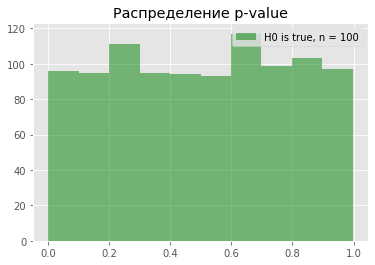

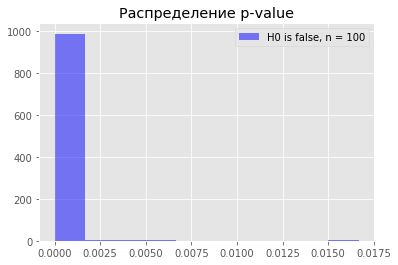

In [17]:
plt.hist(pexp3, label = 'H0 is true, n = 100', color = 'g', alpha = 0.5)
plt.legend()
plt.title('Распределение p-value')
plt.show()

plt.hist(pexp3f, label = 'H0 is false, n = 100', color = 'b', alpha = 0.5)
plt.legend()
plt.title('Распределение p-value')
plt.show()

### Задание 2

In [10]:
def wald_stat(X1, X2, var1, var2):
    s = (np.mean(X1) - np.mean(X2))/np.sqrt(var1/len(X1) + var2/len(X2))
    return {'statistic': s, 'p-value': 2*(1-norm.cdf(abs(s)))}

In [11]:
wald_stat(X1, X2, 1, 1)['p-value']

0.9999999999999998

#### 1 случай: выборки из одного распределения с равной дисперсией

In [8]:
N_r = 10^3
N_s = [2,3,4,5,10,20,30,40,50,100]
alpha = 0.05

##### Нормальное распределение

In [29]:
np.random.seed(3)
count_error = []
countw_error = []
countm_error = []
counts_error = []
for i in N_s:
    i_error = [] # сохраняем число единичек 
    iw_error = []
    im_error = []
    is_error = []
    for t in range(0, N_r):
        for delta in np.arange(0, 3.1, 0.1):
            X1 = norm.rvs(0,1, i)
            X2 = norm.rvs(delta, 1, i)
            X2 = X2 - np.mean(X2)
            tt = ttest_ind(X1, X2, equal_var = True)
            wt = wald_stat(X1, X2, 1, 1)
            mt = scipy.stats.mannwhitneyu(X1, X2) #H0 - distributions are equal
            signt = scipy.stats.wilcoxon(X1, X2)
            if tt[1] <= 0.025: ### для t-test
                i_error.append(1)
            else:
                i_error.append(0)
            if wt['p-value'] <= 0.025: ### для z-test
                iw_error.append(1)
            else:
                iw_error.append(0)
            if mt[1] <= 0.025: ### для mannwhitneyu
                im_error.append(1)
            else:
                im_error.append(0)
            if signt[1] <= 0.025: ### для signtest
                is_error.append(1)
            else:
                is_error.append(0)
                
    count_error.append(np.sum(i_error)/len(i_error))
    countw_error.append(np.sum(iw_error)/len(iw_error))
    countm_error.append(np.sum(im_error)/len(im_error))
    counts_error.append(np.sum(is_error)/len(is_error))
    


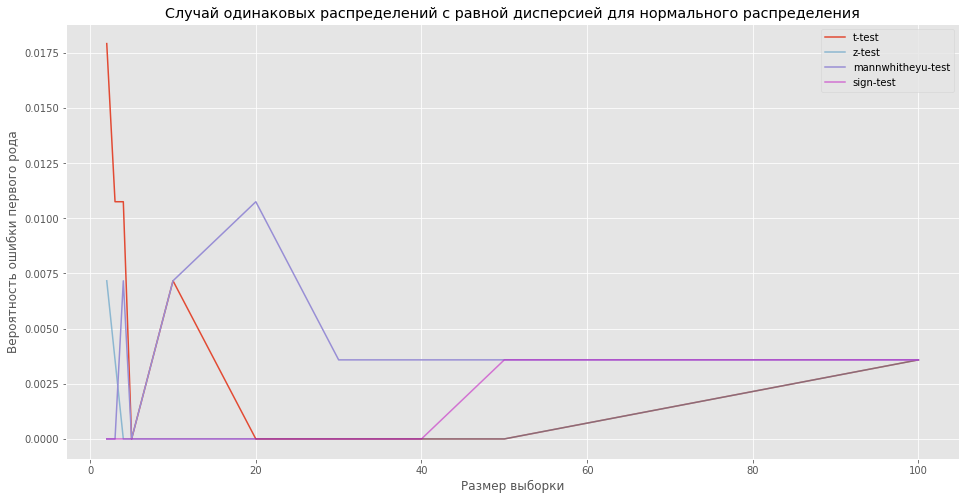

In [30]:
plt.figure(figsize=(16,8))
plt.plot(N_s, count_error, label = 't-test')
plt.plot(N_s, countw_error, alpha = 0.5, label = 'z-test') # не сложно заметить, что при большом n t-распределение стремится к нормальному и результаты похожи
plt.plot(N_s, countm_error, label = 'mannwhitheyu-test')
plt.plot(N_s, counts_error, alpha = 0.5, label = 'sign-test', c = 'm') 
plt.legend()
plt.xlabel('Размер выборки')
plt.ylabel('Вероятность ошибки первого рода')
plt.title('Случай одинаковых распределений с равной дисперсией для нормального распределения')
plt.show()

In [55]:
N_s = [2, 3,4,5,10,20,30,40,50,100]
alpha = 0.05

In [76]:
np.random.seed(3)
count_error = []
countw_error = []
countm_error = []
counts_error = []
for i in N_s:
    i_error = [] # сохраняем число единичек 
    iw_error = []
    im_error = []
    is_error = []
    for t in range(0, N_r):
        for delta in np.arange(0, 3.1, 0.1):
            X1 = lognorm.rvs(s = 1, scale = np.exp(1/2), size = i)
            X1 = (X1 - np.mean(X1))/np.sqrt(np.var(X1, ddof = 1))
            X2 = lognorm.rvs(s = 1, scale = np.exp(1/2 + delta), size = i)
            X2 = (X2 - np.mean(X2))/np.sqrt(np.var(X2, ddof = 1))
            tt = ttest_ind(X1, X2, equal_var = True)
            wt = wald_stat(X1, X2, 1, 1)
            mt = scipy.stats.mannwhitneyu(X1, X2) #H0 - distributions are equal
            signt = scipy.stats.wilcoxon(X1, X2)
            if tt[1] <= 0.05: ### для t-test
                i_error.append(1)
            else:
                i_error.append(0)
            if wt['p-value'] <= 0.05: ### для z-test
                iw_error.append(1)
            else:
                iw_error.append(0)
            if mt[1] <= 0.05: ### для mannwhitneyu
                im_error.append(1)
            else:
                im_error.append(0)
            if signt[1] <= 0.05: ### для signtest
                is_error.append(1)
            else:
                is_error.append(0)
                
    count_error.append(np.sum(i_error)/len(i_error))
    countw_error.append(np.sum(iw_error)/len(iw_error))
    countm_error.append(np.sum(im_error)/len(im_error))
    counts_error.append(np.sum(is_error)/len(is_error))
    

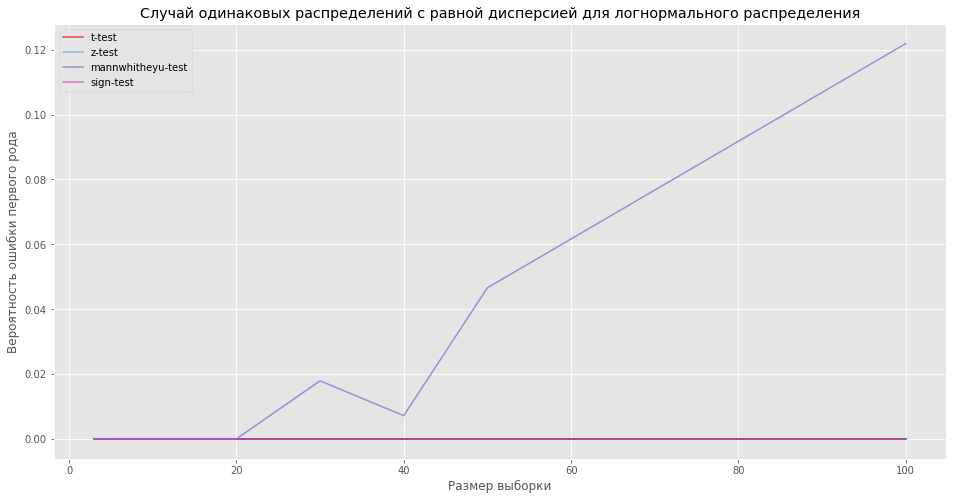

In [77]:
plt.figure(figsize=(16,8))
plt.plot(N_s, count_error, label = 't-test')
plt.plot(N_s, countw_error, alpha = 0.5, label = 'z-test') # не сложно заметить, что при большом n t-распределение стремится к нормальному и результаты похожи
plt.plot(N_s, countm_error, label = 'mannwhitheyu-test')
plt.plot(N_s, counts_error, alpha = 0.5, label = 'sign-test', c = 'm') 
plt.legend()
plt.xlabel('Размер выборки')
plt.ylabel('Вероятность ошибки первого рода')
plt.title('Случай одинаковых распределений с равной дисперсией для логнормального распределения')
plt.show()

In [78]:
X1 = norm.rvs(1,1,2)
X2 = norm.rvs(0.3,1,2)
print(wald_stat(X1, X2, 1, 1)) # Wald-test, asymptotic normal, equal variance
print(ttest_ind(X1, X2, equal_var = True)) # t-test: Equal sample sizes, equal variance
### отвергаем H0 на любом разумном уровне значимости обоими тестами

print(scipy.stats.mannwhitneyu(X1, X2)) #H0 - distributions are equal
print(scipy.stats.wilcoxon(X1, X2)) #H0 - distributions are equal, тест знаков
### H0 отвергается


{'statistic': 0.12130434424896108, 'p-value': 0.903449979217612}
Ttest_indResult(statistic=0.19775104441121816, pvalue=0.8615162100859004)
MannwhitneyuResult(statistic=2.0, pvalue=0.34926767915166934)
WilcoxonResult(statistic=1.0, pvalue=0.6547208460185769)


In [79]:
np.random.seed(3)
count_error = []
countw_error = []
countm_error = []
counts_error = []
for i in N_s:
    i_error = [] # сохраняем число единичек 
    iw_error = []
    im_error = []
    is_error = []
    for t in range(0, N_r):
        for delta in np.arange(0, 3.1, 0.1):
            X1 = cauchy.rvs(size = i)
            X2 = cauchy.rvs(loc = delta, size = i)
            X2 = (X2 - np.mean(X2))/np.sqrt(np.var(X2, ddof = 1))
            tt = ttest_ind(X1, X2, equal_var = True)
            wt = wald_stat(X1, X2, 1, 1)
            mt = scipy.stats.mannwhitneyu(X1, X2) #H0 - distributions are equal
            signt = scipy.stats.wilcoxon(X1, X2)
            if tt[1] <= 0.05: ### для t-test
                i_error.append(1)
            else:
                i_error.append(0)
            if wt['p-value'] <= 0.05: ### для z-test
                iw_error.append(1)
            else:
                iw_error.append(0)
            if mt[1] <= 0.05: ### для mannwhitneyu
                im_error.append(1)
            else:
                im_error.append(0)
            if signt[1] <= 0.05: ### для signtest
                is_error.append(1)
            else:
                is_error.append(0)
                
    count_error.append(np.sum(i_error)/len(i_error))
    countw_error.append(np.sum(iw_error)/len(iw_error))
    countm_error.append(np.sum(im_error)/len(im_error))
    counts_error.append(np.sum(is_error)/len(is_error))
    

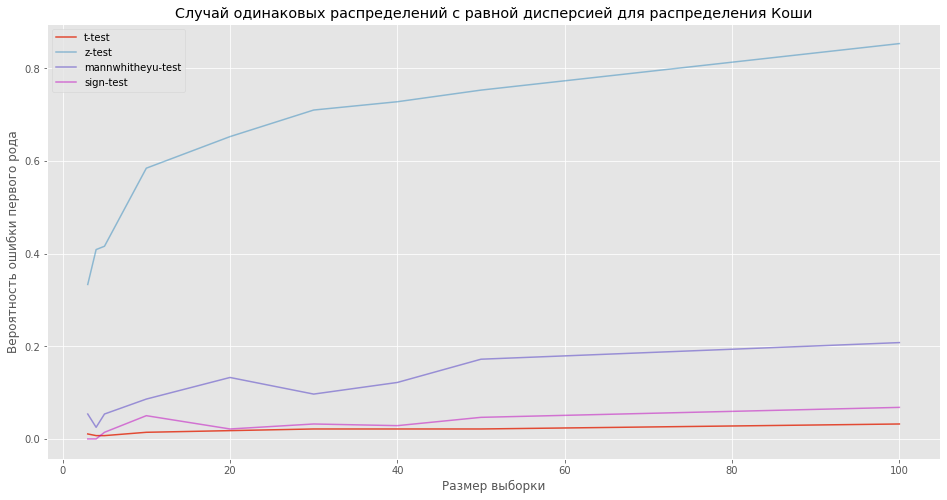

In [80]:
plt.figure(figsize=(16,8))
plt.plot(N_s, count_error, label = 't-test')
plt.plot(N_s, countw_error, alpha = 0.5, label = 'z-test') # не сложно заметить, что при большом n t-распределение стремится к нормальному и результаты похожи
plt.plot(N_s, countm_error, label = 'mannwhitheyu-test')
plt.plot(N_s, counts_error, alpha = 0.5, label = 'sign-test', c = 'm') 
plt.legend()
plt.xlabel('Размер выборки')
plt.ylabel('Вероятность ошибки первого рода')
plt.title('Случай одинаковых распределений с равной дисперсией для распределения Коши')
plt.show()

Кажется, причина такой печали с z-test кроется в том, что для распределения Коши не выполнен закон больших чисел из-за неопределенных моментов.

#### 2 случай: выборки из одного распределения с разной дисперсией

In [83]:
np.random.seed(3)
count_error = []
countw_error = []
countm_error = []
counts_error = []
for i in N_s:
    i_error = [] # сохраняем число единичек 
    iw_error = []
    im_error = []
    is_error = []
    for t in range(0, N_r):
        for delta in np.arange(0, 3.1, 0.1):
            X1 = norm.rvs(0,1, i)
            X2 = norm.rvs(delta, 2, i)
            X2 = (i-1)*(X2 - delta)/np.sqrt(2)
            tt = ttest_ind(X1, X2, equal_var = True)
            wt = wald_stat(X1, X2, 1, 2)
            mt = scipy.stats.mannwhitneyu(X1, X2) #H0 - distributions are equal
            signt = scipy.stats.wilcoxon(X1, X2)
            if tt[1] <= 0.025: ### для t-test
                i_error.append(1)
            else:
                i_error.append(0)
            if wt['p-value'] <= 0.025: ### для z-test
                iw_error.append(1)
            else:
                iw_error.append(0)
            if mt[1] <= 0.025: ### для mannwhitneyu
                im_error.append(1)
            else:
                im_error.append(0)
            if signt[1] <= 0.025: ### для signtest
                is_error.append(1)
            else:
                is_error.append(0)
                
    count_error.append(np.sum(i_error)/len(i_error))
    countw_error.append(np.sum(iw_error)/len(iw_error))
    countm_error.append(np.sum(im_error)/len(im_error))
    counts_error.append(np.sum(is_error)/len(is_error))

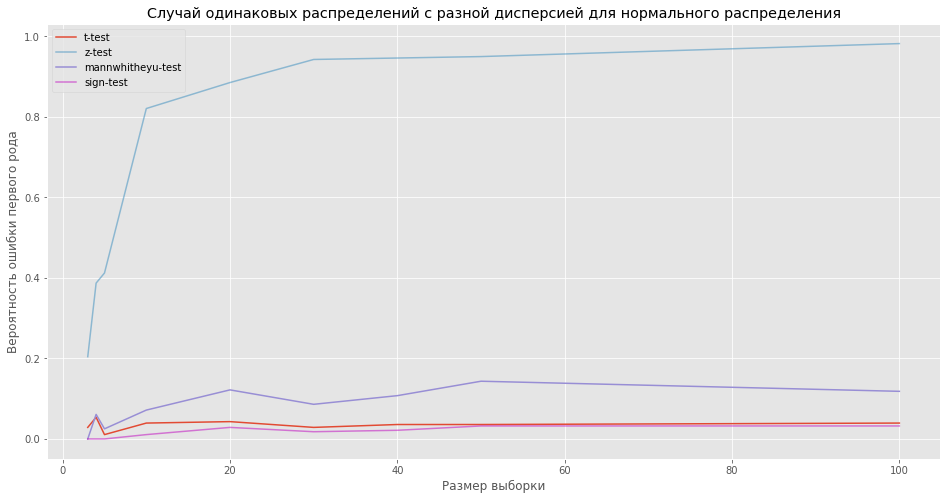

In [84]:
plt.figure(figsize=(16,8))
plt.plot(N_s, count_error, label = 't-test')
plt.plot(N_s, countw_error, alpha = 0.5, label = 'z-test') # не сложно заметить, что при большом n t-распределение стремится к нормальному и результаты похожи
plt.plot(N_s, countm_error, label = 'mannwhitheyu-test')
plt.plot(N_s, counts_error, alpha = 0.5, label = 'sign-test', c = 'm') 
plt.legend()
plt.xlabel('Размер выборки')
plt.ylabel('Вероятность ошибки первого рода')
plt.title('Случай одинаковых распределений с разной дисперсией для нормального распределения')
plt.show()

#### 3 случай: выборки из разных распределений с одинаковыми дисперсиями

In [37]:
F1 = norm.rvs(1,1,100)
F2 = expon.rvs(scale = 1, size = 100)

print(wald_stat(F1, F2, 1, 3)) # Wald-test, asymptotic normal, not equal variance
print(ttest_ind(F1, F2, equal_var = False)) # t-test: Equal sample sizes, not equal variance
### отвергаем H0 на любом разумном уровне значимости обоими тестами

print(scipy.stats.mannwhitneyu(F1, F2)) #H0 - distributions are equal
print(scipy.stats.wilcoxon(F1, F2)) #H0 - distributions are equal, тест знаков
### H0 отвергается


{'statistic': -0.13389592812039997, 'p-value': 0.8934848701820295}
Ttest_indResult(statistic=-0.17534852754291122, pvalue=0.8609880578328323)
MannwhitneyuResult(statistic=4736.0, pvalue=0.2598418752381669)
WilcoxonResult(statistic=2508.0, pvalue=0.9533889759974613)


#### 4 случай: выборки из разных распределений с разными дисперсиями

In [38]:
G1 = norm.rvs(1,1,100)
G2 = expon.rvs(scale = 1/3, size = 100)

print(wald_stat(G1, G2, 1, (1/3)**2)) # Wald-test, asymptotic normal, not equal variance
print(ttest_ind(G1, G2, equal_var = False)) # t-test: Equal sample sizes, not equal variance
### отвергаем H0 на любом разумном уровне значимости обоими тестами

print(scipy.stats.mannwhitneyu(G1, G2)) #H0 - distributions are equal
print(scipy.stats.wilcoxon(G1, G2)) #H0 - distributions are equal, тест знаков
### H0 отвергается


{'statistic': 7.4233798338941765, 'p-value': 1.141309269314661e-13}
Ttest_indResult(statistic=7.682795375130668, pvalue=2.7954913541442215e-12)
MannwhitneyuResult(statistic=2195.0, pvalue=3.6289219325612044e-12)
WilcoxonResult(statistic=676.0, pvalue=2.051135407338735e-10)


### Задание 3

Судя по картинке, на Центральный Лондон выпало 67 бомб

In [33]:
data_all = pd.read_csv('v2_bombing_london.csv', index_col=0)

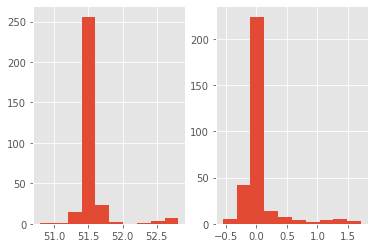

In [34]:
fig, axis = plt.subplots(1,2)
axis[0].hist(data_all['y'])
axis[1].hist(data_all['x'])
plt.show()

In [35]:
print(np.percentile(data_all['y'], q = 95))
print(np.percentile(data_all['y'], q = 5))

51.7489708
51.39896015


Разобьем на глаз :)

In [36]:
y = data_all['y']
a = np.percentile(data_all['y'], q = 60)
b =  np.percentile(data_all['y'], q = 40)
data_high = data_all[y<a]
data = data_high[y>b]

print(np.percentile(data['x'], q = 95))
print(np.percentile(data['y'], q = 95))

0.08885184999999997
51.5261271


C:\Users\DNS\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [37]:
data.shape

(62, 4)

Наверное, имеет смысл разбить область на небольшие квадраты :)

In [38]:
km = KMeans(n_clusters = 10).fit(data[['x', 'y']])
area = km.labels_ # нашли точки, которые лежат примерно в одном радиусе
data['area'] = area
expected = len(area)/10 # H0 - равномерно в каждой области

C:\Users\DNS\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Будем использовать Критерий Пирсона. Его суть - сравнить квадраты отклонений наблюдаемого распределения от тестируемого. В нашем случае тестируемое - равномерное.

In [39]:
import collections
c = collections.Counter(area).values()
print(r'Наблюдемое значение $\chi^2$ =', np.sum((np.array(list(c))-expected)**2)/20) #подсчитали квадраты отклонений и просуммировали доли

Наблюдемое значение $\chi^2$ = 6.58


In [40]:
chi2.ppf(q = 0.95, df = 9) # критическое значение. Левее него H0 отвергается

16.918977604620448

In [53]:
data.y.max()

51.528217

Видим, что наблюдаемое значение статистики попало в область не отвержения H0 :). Следовательно, гипотеза о равномерности бросани бомб не отвергнута.

Теперь мы предполагаем, что верна H0. Посчитаем зависимость ошибки первого рода от числа областей, на которые делим Центральный Лондон. 

In [93]:
X1 = np.random.uniform(51.492126, 51.528217, size = 62)
X2 = np.random.uniform(-0.408458, 0.104949, size = 62)
test_data = pd.DataFrame({'Y': X1, 'X': X2})

In [94]:
def emp_one_type_error(test_data, alpha):
    type_1 = []
    
    for i in range(0, 100):
        test_data = test_data.sample(frac = 1)        
        km = KMeans(n_clusters = 10).fit(test_data[['Y', 'X']])
        area = km.labels_ # нашли точки, которые лежат примерно в одном радиусе
        test_data['area'] = area
        expected = len(area)/10 # H0 - равномерно в каждой области
        c = collections.Counter(area).values()
        stat = np.sum((np.array(list(c))-expected)**2)/10 
        if chi2.ppf(q = 1-alpha, df = i-1) < stat:
            type_1.append(1)
        else:
            type_1.append(0)

    return np.mean(type_1)

In [ ]:
B1 =  beta(51.492126, 51.528217, size = 62)
B2 = np.random.uniform(-0.408458, 0.104949, size = 62)
test_data = pd.DataFrame({'Y': X1, 'X': X2})

In [116]:
def emp_second_type_error(alpha):
    type_2 = []
    
    for i in np.linspace(-0.99,2):
        B1 =  beta.rvs(1+i, 1+i, size = 62)
        B2 =  beta.rvs(1+i, 1+i, size = 62)
        test_data = pd.DataFrame({'Y': B1, 'X': B2})   
        km = KMeans(n_clusters = 10).fit(test_data[['Y', 'X']])
        area = km.labels_ # нашли точки, которые лежат примерно в одном радиусе
        test_data['area'] = area
        expected = len(area)/10 # H0 - равномерно в каждой области
        c = collections.Counter(area).values()
        stat = np.sum((np.array(list(c))-expected)**2)/10 
        if chi2.ppf(q = 1-alpha, df = i-1) > stat:
            type_2.append(1)
        else:
            type_2.append(0)

    return np.mean(type_2)

In [95]:
emp_one_type_error(test_data, 0.05) # :)

0.01

In [117]:
emp_second_type_error(0.05) # :) # Веротность ошибки 2 рода

0.04

### Выводы

#### Задача 4 